In [1]:
%matplotlib inline

In [11]:
import numpy as np
import scipy.stats as stats
import pickle
import matplotlib.pyplot as plt
from os import path, getcwd, makedirs

In [6]:
# savepath = path.join(getcwd(), 'data', 'BO', 'generating_all_FOM_dict', 'real_machine', 'toronto', f"{300*2048}_experiments_3")
savepath = path.join(getcwd(), 'data', 'BO', 'generating_all_FOM_dict', 'real_machine', 'toronto', f"{300*2048}_experiments_3")

In [89]:
with open(path.join(savepath, "FOM_all_res_circs.pickle"), 'rb') as f:
    all_res = pickle.load(f)

with open(path.join(savepath, "FOM_avs_circs.pickle"), 'rb') as f:
    avs = pickle.load(f)

with open(path.join(savepath, "FOM_stds_upp_circs.pickle"), 'rb') as f:
    stds_upp = pickle.load(f)

with open(path.join(savepath, "FOM_stds_low_circs.pickle"), 'rb') as f:
    stds_low = pickle.load(f)

with open(path.join(savepath, "FOM_mins_circs.pickle"), 'rb') as f:
    mins = pickle.load(f)

with open(path.join(savepath, "FOM_maxs_circs.pickle"), 'rb') as f:
    maxs = pickle.load(f)

In [65]:
num_circs = 56
idx = 1
results1 = sorted(all_res[[i for i in all_res.keys()][idx]] - np.mean(all_res[[i for i in all_res.keys()][idx]]))

In [66]:
num_circs = 112
idx = 2
results2 = sorted(all_res[[i for i in all_res.keys()][idx]] - np.mean(all_res[[i for i in all_res.keys()][idx]]))

In [70]:
num_circs = 224
idx = 4
results3 = sorted(all_res[[i for i in all_res.keys()][idx]] - np.mean(all_res[[i for i in all_res.keys()][idx]]))

In [71]:
num_circs = 896
idx = -1
results4 = sorted(all_res[[i for i in all_res.keys()][idx]] - np.mean(all_res[[i for i in all_res.keys()][idx]]))

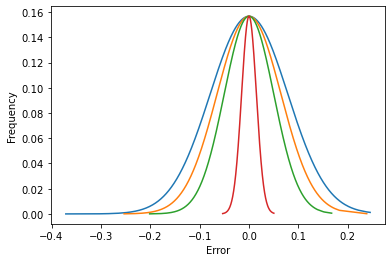

In [72]:
plt.figure(1)
weights = np.ones_like(results1)/float(len(results1))
# a1,b1,_ = plt.hist(results1, weights=weights, bins=20, alpha=0.85)
fit1 = stats.norm.pdf(results1, np.mean(results1), np.std(results1))
fit1 = fit1*(np.max(a1)/np.max(fit1))
plt.plot(results1, fit1, marker=None)

weights = np.ones_like(results2)/float(len(results2))
# a1,b1,_ = plt.hist(results2, weights=weights, bins=20, alpha=0.85)
fit1 = stats.norm.pdf(results2, np.mean(results2), np.std(results2))
fit1 = fit1*(np.max(a1)/np.max(fit1))
plt.plot(results2, fit1, marker=None)

weights = np.ones_like(results3)/float(len(results3))
# a1,b1,_ = plt.hist(results3, weights=weights, bins=20, alpha=0.85)
fit1 = stats.norm.pdf(results3, np.mean(results3), np.std(results3))
fit1 = fit1*(np.max(a1)/np.max(fit1))
plt.plot(results3, fit1, marker=None)

weights = np.ones_like(results4)/float(len(results4))
# a1,b1,_ = plt.hist(results4, weights=weights, bins=20, alpha=0.85)
fit1 = stats.norm.pdf(results4, np.mean(results4), np.std(results4))
fit1 = fit1*(np.max(a1)/np.max(fit1))
plt.plot(results4, fit1, marker=None)

plt.xlabel("Error")
plt.ylabel("Frequency")

plt.show()

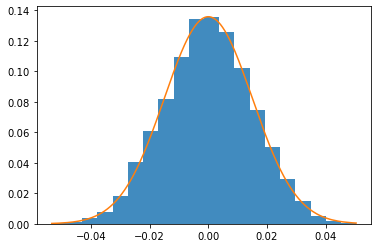

In [129]:
plt.figure(1)
pltrange = [55]
for idx in pltrange:
#     idx = j
    try:
        results1 = sorted(all_res[[i for i in all_res.keys()][idx]] - np.mean(all_res[[i for i in all_res.keys()][idx]]))
    except:
        print(idx)
    weights = np.ones_like(results1)/float(len(results1))
    a1,b1,_ = plt.hist(results1, weights=weights, bins=20, alpha=0.85)
    fit1 = stats.norm.pdf(results1, np.mean(results1), np.std(results1))
    fit1 = fit1*(np.max(a1)/np.max(fit1))
    plt.plot(results1, fit1, marker=None)
plt.show()

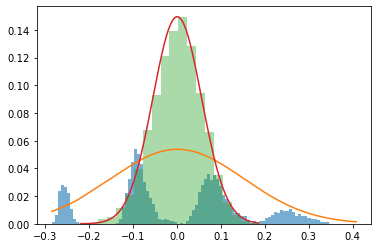

In [147]:
with open(path.join(savepath, "F_all_res_circs.pickle"), 'rb') as f:
    F_all_res = pickle.load(f)
    
plt.figure(1)
pltrange = [200]
for idx in pltrange:
#     idx = j

    results1 = sorted(F_all_res[[i for i in F_all_res.keys()][2]] - np.mean(F_all_res[[i for i in F_all_res.keys()][111]]))
    weights = np.ones_like(results1)/float(len(results1))
    a1,b1,_ = plt.hist(results1, weights=weights, bins=100, alpha=0.6)
    fit1 = stats.norm.pdf(results1, np.mean(results1), np.std(results1))
    fit1 = fit1*(np.max(a1)/np.max(fit1))
    plt.plot(results1, fit1, marker=None)
    
    results1 = sorted(all_res[[i for i in all_res.keys()][3]] - np.mean(all_res[[i for i in all_res.keys()][55]]))
    weights = np.ones_like(results1)/float(len(results1))
    a1,b1,_ = plt.hist(results1, weights=weights, bins=20, alpha=0.4)
    fit1 = stats.norm.pdf(results1, np.mean(results1), np.std(results1))
    fit1 = fit1*(np.max(a1)/np.max(fit1))
    plt.plot(results1, fit1, marker=None)
plt.show()

In [150]:
from qutip import sigmax, sigmay, sigmaz, qeye, cnot, tensor
idx = 0
ops = [qeye(2), sigmax(), sigmay(), sigmaz()]
for i in range(len(ops)):
    for j in range(len(ops)):
        for k in range(len(ops)):
            for l in range(len(ops)):
                _r = tensor(ops[i], ops[j])*cnot()*tensor(ops[k], ops[l])
                if _r.tr() != 0:
                    print((i,j), (k,l), _r.tr())
                    idx += 1
print(idx)

(0, 0) (0, 0) 2.0
(0, 0) (0, 1) 2.0
(0, 0) (3, 0) 2.0
(0, 0) (3, 1) -2.0
(0, 1) (0, 0) 2.0
(0, 1) (0, 1) 2.0
(0, 1) (3, 0) -2.0
(0, 1) (3, 1) 2.0
(0, 2) (0, 2) 2.0
(0, 2) (0, 3) -2j
(0, 2) (3, 2) 2.0
(0, 2) (3, 3) 2j
(0, 3) (0, 2) 2j
(0, 3) (0, 3) 2.0
(0, 3) (3, 2) -2j
(0, 3) (3, 3) 2.0
(1, 0) (1, 0) 2.0
(1, 0) (1, 1) 2.0
(1, 0) (2, 0) -2j
(1, 0) (2, 1) 2j
(1, 1) (1, 0) 2.0
(1, 1) (1, 1) 2.0
(1, 1) (2, 0) 2j
(1, 1) (2, 1) -2j
(1, 2) (1, 2) 2.0
(1, 2) (1, 3) -2j
(1, 2) (2, 2) -2j
(1, 2) (2, 3) 2.0
(1, 3) (1, 2) 2j
(1, 3) (1, 3) 2.0
(1, 3) (2, 2) -2.0
(1, 3) (2, 3) -2j
(2, 0) (1, 0) 2j
(2, 0) (1, 1) -2j
(2, 0) (2, 0) 2.0
(2, 0) (2, 1) 2.0
(2, 1) (1, 0) -2j
(2, 1) (1, 1) 2j
(2, 1) (2, 0) 2.0
(2, 1) (2, 1) 2.0
(2, 2) (1, 2) 2j
(2, 2) (1, 3) -2.0
(2, 2) (2, 2) 2.0
(2, 2) (2, 3) -2j
(2, 3) (1, 2) 2.0
(2, 3) (1, 3) 2j
(2, 3) (2, 2) 2j
(2, 3) (2, 3) 2.0
(3, 0) (0, 0) 2.0
(3, 0) (0, 1) -2.0
(3, 0) (3, 0) 2.0
(3, 0) (3, 1) 2.0
(3, 1) (0, 0) -2.0
(3, 1) (0, 1) 2.0
(3, 1) (3, 0) 2.0
(3, 1) (3, 1) 

C:\Users\seang\anaconda3\envs\BO_env\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  
